### Practica 3: Predicción

In [1]:
import pandas as pd

df = pd.read_csv("ventas_tiendas.csv")

#### 1 ¿De cuánto son las ventas mensuales promedio?

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptivos
print(df.info())
df.describe().round(2).T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_tienda              200 non-null    int64  
 1   region                 200 non-null    object 
 2   num_empleados          200 non-null    int64  
 3   gasto_marketing        180 non-null    float64
 4   satisfaccion_cliente   180 non-null    float64
 5   competidores_cercanos  200 non-null    int64  
 6   ventas_mensuales       200 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 11.1+ KB
None


,count,mean,std,min,25%,50%,75%,max
id_tienda,200.0,100.50,57.88,1.00,50.75,100.50,150.25,200.00
num_empleados,200.0,27.98,12.42,5.00,19.00,29.00,38.00,49.00
gasto_marketing,180.0,21012.58,8009.80,346.02,16411.55,20814.94,26988.76,38993.13
satisfaccion_cliente,180.0,74.71,9.99,47.59,68.67,74.23,80.74,102.84
competidores_cercanos,200.0,4.62,2.89,0.00,2.00,5.00,7.00,9.00
ventas_mensuales,200.0,34380.22,19761.73,868.80,24512.09,31224.97,39264.09,117655.79


#### 2 ¿Cuál es la correlación entre y gasto en marketing?

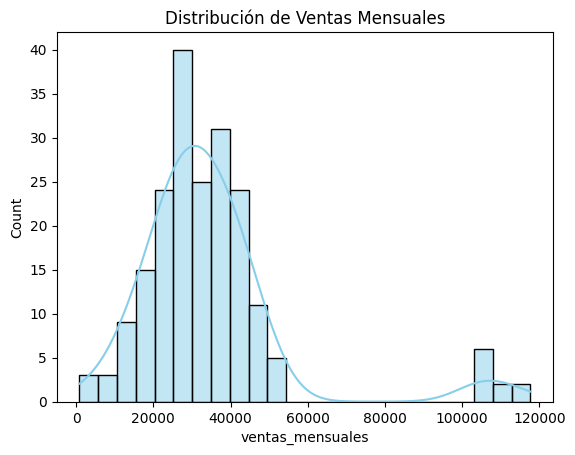

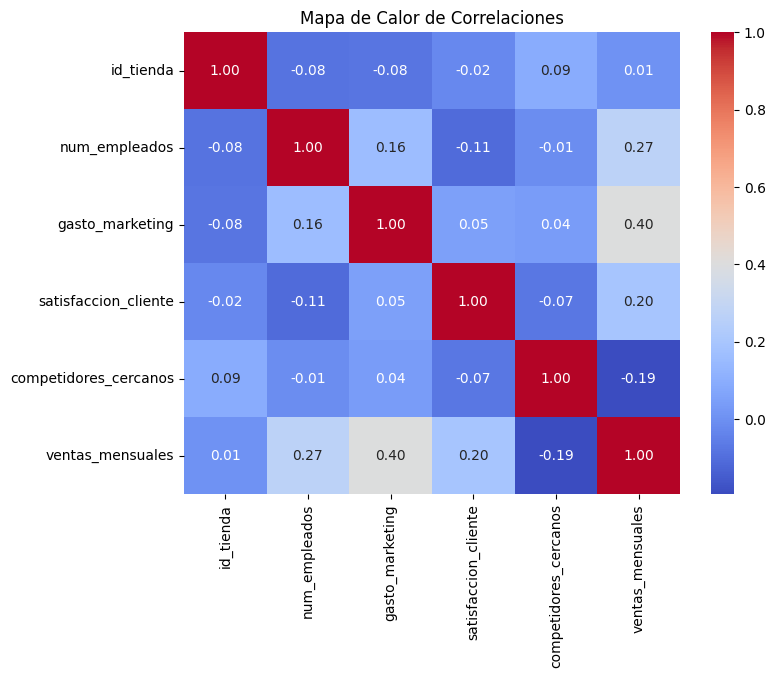

In [4]:
# Distribución de la variable de interés
sns.histplot(df["ventas_mensuales"], kde=True, color='skyblue')
plt.title("Distribución de Ventas Mensuales")

# Mapa de calor de correlaciones
corr = df.select_dtypes('number').corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

In [11]:
from sklearn.impute import SimpleImputer
import numpy as np

# Separar numéricas y categóricas
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

# Imputar
df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])
df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])

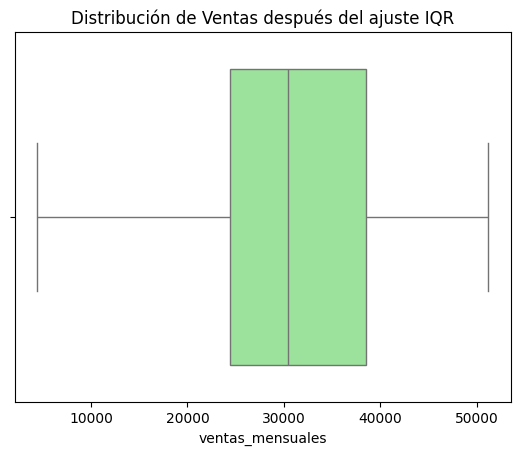

In [12]:
Q1 = df["ventas_mensuales"].quantile(0.25)
Q3 = df["ventas_mensuales"].quantile(0.75)
IQR = Q3 - Q1

# Filtro para mantener solo los valores dentro de 1.5*IQR
df = df[(df["ventas_mensuales"] >= Q1 - 1.5*IQR) & 
        (df["ventas_mensuales"] <= Q3 + 1.5*IQR)]

sns.boxplot(x=df["ventas_mensuales"], color="lightgreen")
plt.title("Distribución de Ventas después del ajuste IQR")
plt.show()

#### 3 Despues de corregir los datos faltantes y el sesgo ¿Cuántas observaciones tiene la base de datos?
#### 4 ¿Cuál es el nuevo promedio de ventas mensuales al mes?

In [14]:
# Descriptivos
print(df.info())
df.describe().round(2).T


<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_tienda              188 non-null    float64
 1   region                 188 non-null    object 
 2   num_empleados          188 non-null    float64
 3   gasto_marketing        188 non-null    float64
 4   satisfaccion_cliente   188 non-null    float64
 5   competidores_cercanos  188 non-null    float64
 6   ventas_mensuales       188 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.8+ KB
None


,count,mean,std,min,25%,50%,75%,max
id_tienda,188.0,101.19,57.44,1.00,52.75,101.50,150.25,200.00
num_empleados,188.0,27.84,12.54,5.00,18.75,29.00,38.00,49.00
gasto_marketing,188.0,20640.15,7238.86,346.02,16688.62,20814.94,25946.51,38206.09
satisfaccion_cliente,188.0,74.35,9.34,47.59,69.10,74.23,79.93,102.84
competidores_cercanos,188.0,4.66,2.89,0.00,2.00,5.00,7.00,9.00
ventas_mensuales,188.0,30809.50,9975.13,4443.29,24380.52,30396.81,38505.19,51181.89


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop("ventas_mensuales", axis=1)
y = df["ventas_mensuales"]

# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Modelos
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# Entrenar
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### 5 ¿Cuánto aumentan en promedio las ventas si la tienda se ubica en la región sur?
#### 6 ¿Consideras que alguna variable no tiene relevancia o es innecesaria? ¿Cuál?

In [17]:
import pandas as pd

# Coeficientes regresión lineal
betas = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": lr.coef_
}).sort_values("Coeficiente", ascending=False)

# Importancia en Random Forest
importancias = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf.feature_importances_
}).sort_values("Importancia", ascending=False)

print("\nCoeficientes Regresión Lineal:")
print(betas.head())

print("\nVariables más importantes (Random Forest):")
print(importancias.head())


Coeficientes Regresión Lineal:
               Variable  Coeficiente
6            region_Sur  1157.827580
1         num_empleados   213.970456
3  satisfaccion_cliente   104.602885
0             id_tienda    13.958441
2       gasto_marketing     0.358609

Variables más importantes (Random Forest):
                Variable  Importancia
1          num_empleados     0.228287
2        gasto_marketing     0.225348
0              id_tienda     0.204395
3   satisfaccion_cliente     0.158444
4  competidores_cercanos     0.139008


#### 7 ¿Cuál es el Error Medio Absoluto del modelo de regresión lineal?
#### 8 ¿El modelo de regresión lineal es el mejor, según las metricas de ajuste?
#### 9 ¿Los modelos estan sobre-estimando o sub-estimando?

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predicciones
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Cálculo de métricas
def metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    me = (y_true - y_pred).mean()
    return mae, rmse, me

metrics = pd.DataFrame({
    "Modelo": ["Regresión Lineal", "Random Forest"],
    "MAE": [*metricas(y_test, y_pred_lr)][0:1] + [*metricas(y_test, y_pred_rf)][0:1],
})
metrics["RMSE"] = [metricas(y_test, y_pred_lr)[1], metricas(y_test, y_pred_rf)[1]]
metrics["ME"] = [metricas(y_test, y_pred_lr)[2], metricas(y_test, y_pred_rf)[2]]
print(metrics)

             Modelo          MAE         RMSE           ME
0  Regresión Lineal  6445.360600  7577.956808  1328.896236
1     Random Forest  6165.375986  7626.482436  2664.886936


#### 10 Con una grafica de barras grafica las variables más importantes según el modelo de Random Forest ¿Cuál es la variable más importante según el modelo?

/tmp/ipykernel_3250/3076984179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=top_vars, palette="viridis")


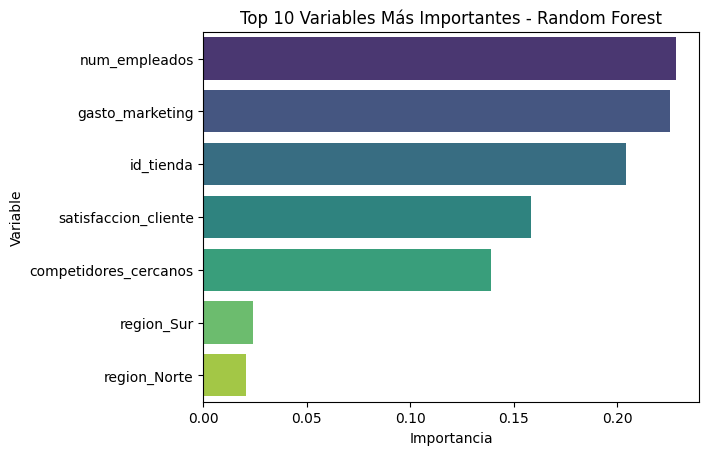

In [20]:
top_vars = importancias.head(10)
sns.barplot(x="Importancia", y="Variable", data=top_vars, palette="viridis")
plt.title("Top 10 Variables Más Importantes - Random Forest")
plt.show()